##### Importing The Libraries 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

##### Data Collection & Analysis

In [2]:
# loading the data from csv file to pandas dataframe.
Customer_data = pd.read_csv(r"C:\Users\hb292\Downloads\Mall_Customers.csv")

In [3]:
# first 5 rows in the dataset
Customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
#finding the number of rows and columns
Customer_data.shape

(200, 5)

In [5]:
# getting some information about the dataset
Customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
#checking missing values
Customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

##### Choosing Annual Income Column & Spending Score Column

In [15]:
X = Customer_data.iloc[:,[3,4]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

#### Choosing The Number Of Clusters

#### WCSS -> Within Cluster Sum of Square

In [16]:
# finding wcss value for differnt number of cluster
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)

    wcss.append(kmeans.inertia_)

##### The kmeans.inertia will give us the wcss value `For each clusters`.The kmeans.inertia fuction lias in KMeans algorithm

And This value is stored in the wcss list So in the first case when the for loop is running this `i` will take the first value which is 1 so I'm splitting the data as only one `clusters` or `Group` and it will fit this data and it will find the wcss value and it will put that in the particular list And onces the for loop is completed it will again carry off this loop again and now it will take the second value 2 now the n_cluster value will be 2 and again this will create a second cluster and it will give wcss value for 2 clusters and This process will be carried out same until we do upto 10 clusters

In [17]:
for i in range(1,11):
    print(f'Number of clusters: {i} -----> WCSS value: {wcss[i-1]}')

Number of clusters: 1 -----> WCSS value: 269981.28
Number of clusters: 2 -----> WCSS value: 183653.32894736843
Number of clusters: 3 -----> WCSS value: 106348.37306211118
Number of clusters: 4 -----> WCSS value: 73880.64496247194
Number of clusters: 5 -----> WCSS value: 44448.45544793371
Number of clusters: 6 -----> WCSS value: 40825.16946386946
Number of clusters: 7 -----> WCSS value: 33642.579220779226
Number of clusters: 8 -----> WCSS value: 26686.837785187785
Number of clusters: 9 -----> WCSS value: 24766.47160979344
Number of clusters: 10 -----> WCSS value: 23103.122085983916


### Plotting a Elbow Graph To Find Which Cluster Has Minimum Value

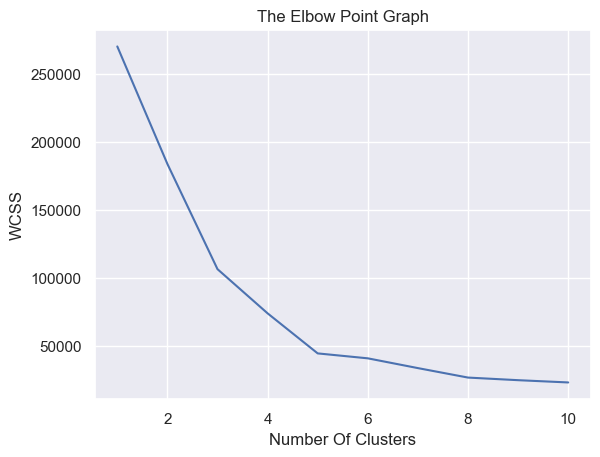

In [18]:
#Plotting the Elbow graph
sns.set()
plt.plot(range(1,11) , wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number Of Clusters')
plt.ylabel('WCSS')
plt.show()

Optimum Number Of Cluster = 5

### Training K-Means Clustering Model

In [19]:
kmeans = KMeans(n_clusters=5 , init='k-means++' , random_state=0)

#Returing a lable for for each data point based on their cluster 

Y = kmeans.fit_predict(X)
Y

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

This are the Number of `cluster`/`lable` They belong to `X` data point.

## Visualizing All Clusters

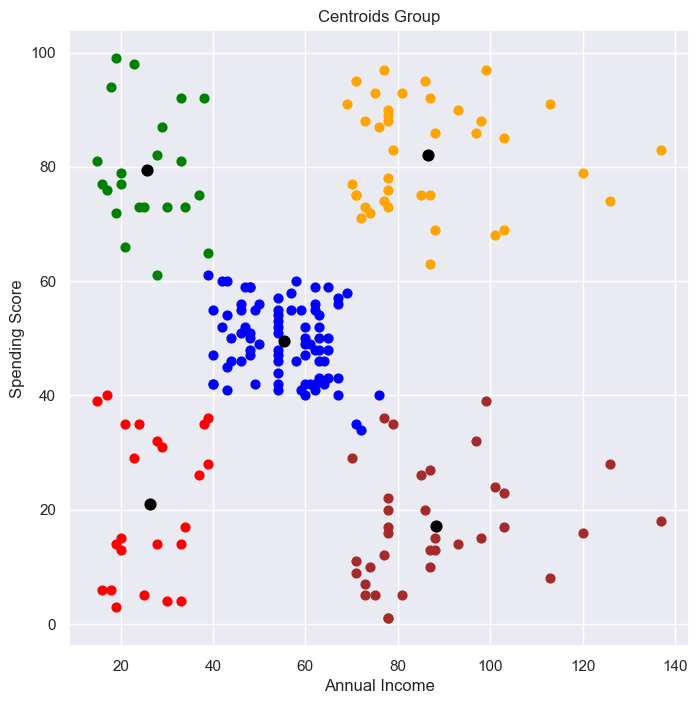

In [21]:
#Plotting all the clusters and their centroids

plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0],X[Y==0,1] , s=40 , c="blue" , label = 'C1')
plt.scatter(X[Y==1,0],X[Y==1,1] , s=40 , c="orange" , label = 'C2')
plt.scatter(X[Y==2,0],X[Y==2,1] , s=40 , c="Brown" , label = 'C3')
plt.scatter(X[Y==3,0],X[Y==3,1] , s=40 , c="red" , label = 'C4')
plt.scatter(X[Y==4,0],X[Y==4,1] , s=40 , c="green" , label = 'C5')

#Plotting the centroids
plt.scatter(kmeans.cluster_centers_[:,0] , kmeans.cluster_centers_[:,1] , s=60 , c='black' , label = 'centroids')
plt.title('Centroids Group')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()